# Evaluating the Results



## Quick look at the data

Just as a quick reference to remember which columns are available.
Double check for stupid mistakes.

In [82]:
import pandas as pd
from _conf import SIMPLIFIED_RESULTS

results = pd.read_json(SIMPLIFIED_RESULTS)
results["opt_gap"] = (results["objective"] - results["lower_bound"]) / results["lower_bound"]
results["opt"] = results["opt_gap"] < 0.001
results

,instance_name,num_nodes,time_limit,strategy,runtime,objective,lower_bound,opt_gap,opt
0,random_euclidean_25_0,25,90,GurobiTspSolver,0.015958,118462718.0,118462718.0,0.000000,True
1,random_euclidean_25_0,25,90,CpSatTspSolverV1,0.060843,118462718.0,118462718.0,0.000000,True
2,random_euclidean_25_1,25,90,GurobiTspSolver,0.014089,80173028.0,80173028.0,0.000000,True
3,random_euclidean_25_1,25,90,CpSatTspSolverV1,0.067534,80173028.0,80173028.0,0.000000,True
4,random_euclidean_25_2,25,90,GurobiTspSolver,0.012594,60810348.0,60810348.0,0.000000,True
...,...,...,...,...,...,...,...,...,...
570,random_euclidean_75_2,75,90,CpSatTspSolverDantzig,53.142703,81191992.0,81191992.0,0.000000,True
571,random_euclidean_75_3,75,90,CpSatTspSolverDantzig,90.353816,86528870.0,86470127.0,0.000679,True
572,random_euclidean_75_4,75,90,CpSatTspSolverDantzig,8.018587,87930036.0,87930036.0,0.000000,True
573,random_euclidean_75_5,75,90,CpSatTspSolverDantzig,74.564132,84375524.0,84375524.0,0.000000,True


In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

## Looking at the runtime

We can take a quick look at the runtime of the different models.
This is a good sanity check to see if the models are actually running.
However, you will notice the sigmoidal shape of the runtime.
The instances do not suddenly get easier, but the runtime is limited by the timeout.
The true runtime can be expected to be an exponential curve.
For this reason, this is not a good metric to compare the models and may be misleading.

runtime
num_nodes strategy                        
25        CpSatTspSolverDantzig   2.768777
          CpSatTspSolverMtz       0.574939
          CpSatTspSolverV1        0.059352
          GurobiTspSolver         0.015791
50        CpSatTspSolverDantzig  34.847465
          CpSatTspSolverMtz      46.748110
          CpSatTspSolverV1        0.792898
          GurobiTspSolver         0.093792
75        CpSatTspSolverDantzig  74.466570
          CpSatTspSolverMtz      69.877860
          CpSatTspSolverV1        5.536496
          GurobiTspSolver         0.274192
100       CpSatTspSolverDantzig  90.388290
          CpSatTspSolverMtz      90.674224
          CpSatTspSolverV1       13.324847
          GurobiTspSolver         0.615100
150       CpSatTspSolverDantzig  90.578716
          CpSatTspSolverMtz      92.933017
          CpSatTspSolverV1       68.153680
          GurobiTspSolver         2.347917
200       CpSatTspSolverV1       90.738846
          GurobiTspSolver         7.395619
250       CpSatTspSolverV1       83.519287
          GurobiTspSolver        14.039726
300       CpSatTspSolverV1       93.315655
          GurobiTspSolver        20.363206
350       CpSatTspSolverV1       94.310177
          GurobiTspSolver        51.925895
400       CpSatTspSolverV1       95.415849
          GurobiTspSolver        80.219658

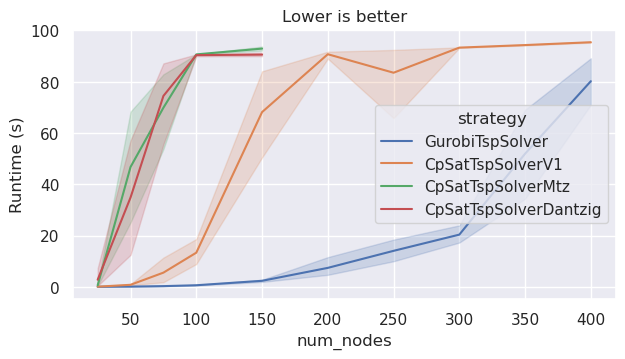

In [84]:
from IPython.display import display
display(results.groupby(["num_nodes", "strategy"])[["runtime"]].mean())
plt.figure(figsize=(7, 3.5))
sns.lineplot(data=results, x="num_nodes", y="runtime", hue="strategy")
plt.ylabel("Runtime (s)")
plt.title("Lower is better")
plt.show()

opt_perc
num_nodes strategy                       
25        CpSatTspSolverDantzig     100.0
          CpSatTspSolverMtz         100.0
          CpSatTspSolverV1          100.0
          GurobiTspSolver           100.0
50        CpSatTspSolverDantzig     100.0
          CpSatTspSolverMtz          70.0
          CpSatTspSolverV1          100.0
          GurobiTspSolver           100.0
75        CpSatTspSolverDantzig      70.0
          CpSatTspSolverMtz          50.0
          CpSatTspSolverV1          100.0
          GurobiTspSolver           100.0
100       CpSatTspSolverDantzig      70.0
          CpSatTspSolverMtz           0.0
          CpSatTspSolverV1          100.0
          GurobiTspSolver           100.0
150       CpSatTspSolverDantzig       0.0
          CpSatTspSolverMtz           0.0
          CpSatTspSolverV1           50.0
          GurobiTspSolver           100.0
200       CpSatTspSolverV1           10.0
          GurobiTspSolver           100.0
250       CpSatTspSolverV1            0.0
          GurobiTspSolver            90.0
300       CpSatTspSolverV1            0.0
          GurobiTspSolver           100.0
350       CpSatTspSolverV1            0.0
          GurobiTspSolver            80.0
400       CpSatTspSolverV1            0.0
          GurobiTspSolver            50.0

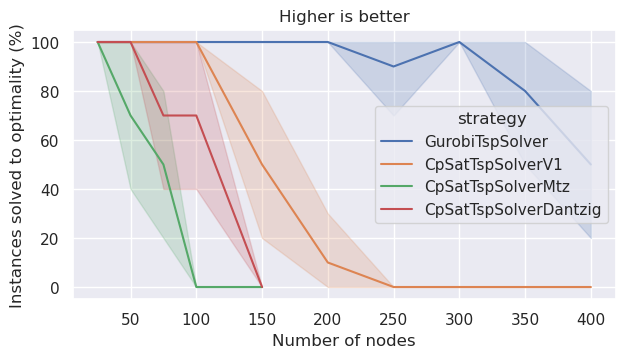

In [85]:
t = results
t["opt_perc"] = t["opt"] * 100
display(t.groupby(["num_nodes", "strategy"])[["opt_perc"]].mean())
plt.figure(figsize=(7, 3.5))
sns.lineplot(data=t, x="num_nodes", y="opt_perc", hue="strategy")
plt.ylabel("Instances solved to optimality (%)")
plt.xlabel("Number of nodes")
plt.title("Higher is better")
plt.show()

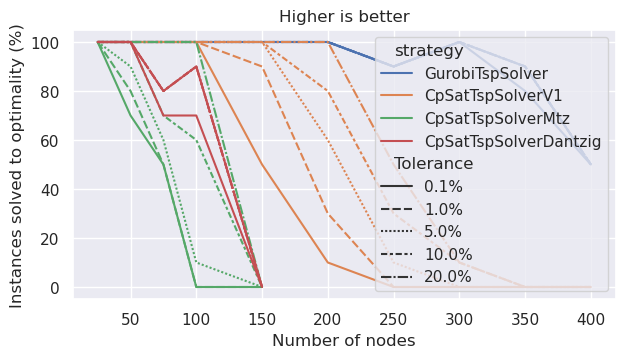

In [86]:
opt_gaps = [0.001, 0.01, 0.05, 0.1, 0.2]
data = []
for opt_gap in opt_gaps:
    t = results.copy()
    t["succ"] = t["opt_gap"] <= opt_gap
    t["Tolerance"] = f"{100*opt_gap}%"
    data.append(t)
t = pd.concat(data)
t["succ_perc"] = t["succ"] * 100
plt.figure(figsize=(7, 3.5))
sns.lineplot(data=t, x="num_nodes", y="succ_perc", hue="strategy", style="Tolerance", errorbar=None)
plt.ylabel("Instances solved to optimality (%)")
plt.xlabel("Number of nodes")
plt.title("Higher is better")
plt.show()

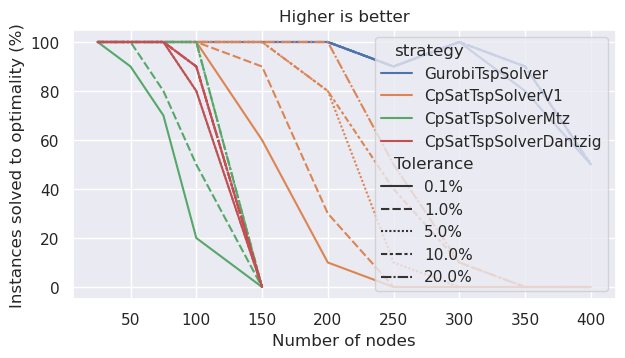

In [87]:
# Same plot but this time use the best lower bound available for each instance.
opt_gaps = [0.001, 0.01, 0.05, 0.1, 0.2]
data = []
best_lb = results.groupby(["instance_name"])[["lower_bound"]].max().reset_index()
for opt_gap in opt_gaps:
    t = results.merge(best_lb, on="instance_name", suffixes=("", "_best_lb")).copy()
    t["opt_gap"] = (t["objective"] - t["lower_bound_best_lb"]) / t["lower_bound_best_lb"]
    t["succ"] = t["opt_gap"] <= opt_gap
    t["Tolerance"] = f"{100*opt_gap}%"
    data.append(t)
t = pd.concat(data)
t["succ_perc"] = t["succ"] * 100
plt.figure(figsize=(7, 3.5))
sns.lineplot(data=t, x="num_nodes", y="succ_perc", hue="strategy", style="Tolerance", errorbar=None)
plt.ylabel("Instances solved to optimality (%)")
plt.xlabel("Number of nodes")
plt.title("Higher is better")
plt.show()

Text(0.5, 1.0, 'Higher is better')

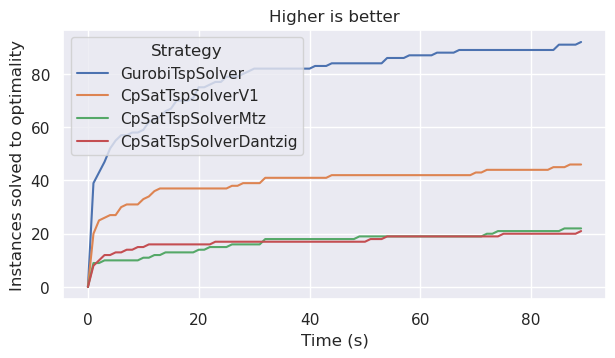

In [88]:
from _conf import TIME_LIMIT
time_steps = [t_ for t_ in range(0, TIME_LIMIT)]
def f(strategy, at_time, tol):
    t = results[results["strategy"] == strategy]
    t = t[t["runtime"] <= at_time]
    t = t[t["opt_gap"] <= tol]
    t.drop_duplicates(subset=["instance_name"], inplace=True)
    return len(t)
data = {
    "Strategy": [],
    "x": [],
    "time": [],
    "tol": [],
}
tolerances = [0.001]
for strateg in results["strategy"].unique().tolist():
    for time in time_steps:
        for tol in tolerances:
            data["Strategy"].append(strateg)
            data["x"].append(time)
            data["time"].append(f(strateg, time, tol))
            data["tol"].append(tol*100)
t = pd.DataFrame(data)
plt.figure(figsize=(7, 3.5))
sns.lineplot(data=t, x="x", y="time", hue="Strategy", errorbar=None)
plt.ylabel("Instances solved to optimality")
plt.xlabel("Time (s)")
plt.title("Higher is better")

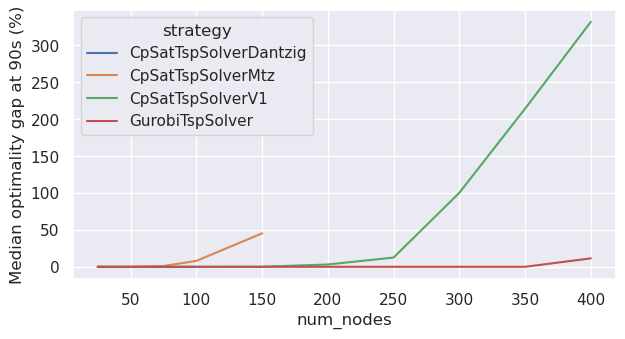

In [89]:
t = results.groupby(["num_nodes", "strategy"])["opt_gap"].median().reset_index()
t["opt_gap_perc"] = t["opt_gap"] * 100
plt.figure(figsize=(7, 3.5))
sns.lineplot(data=t, x="num_nodes", y="opt_gap_perc", hue="strategy")
plt.ylabel("Median optimality gap at 90s (%)")
plt.show()

In [90]:
best_ub = results.groupby(["instance_name"])[["objective"]].min().reset_index()
best_ub

,instance_name,objective
0,random_euclidean_100_0,81299066.0
1,random_euclidean_100_1,82600872.0
2,random_euclidean_100_2,75575284.0
3,random_euclidean_100_3,68469446.0
4,random_euclidean_100_4,75488186.0
...,...,...
95,random_euclidean_75_5,84375524.0
96,random_euclidean_75_6,77511530.0
97,random_euclidean_75_7,86108160.0
98,random_euclidean_75_8,76736360.0


,instance_name,num_nodes,time_limit,strategy,runtime,objective,lower_bound,opt_gap,opt,opt_perc,objective_best,diff_to_best
0,random_euclidean_25_0,25,90,GurobiTspSolver,0.015958,118462718.0,1.184627e+08,0.000000,True,100,118462718.0,0.000000
1,random_euclidean_25_0,25,90,CpSatTspSolverV1,0.060843,118462718.0,1.184627e+08,0.000000,True,100,118462718.0,0.000000
2,random_euclidean_25_0,25,90,CpSatTspSolverMtz,0.127046,118462718.0,1.184627e+08,0.000000,True,100,118462718.0,0.000000
3,random_euclidean_25_0,25,90,CpSatTspSolverDantzig,0.204676,118462718.0,1.184627e+08,0.000000,True,100,118462718.0,0.000000
4,random_euclidean_25_1,25,90,GurobiTspSolver,0.014089,80173028.0,8.017303e+07,0.000000,True,100,80173028.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
280,random_euclidean_400_7,400,90,CpSatTspSolverV1,95.111182,316619716.0,6.574902e+07,3.815581,False,0,83413498.0,279.578514
281,random_euclidean_400_8,400,90,GurobiTspSolver,90.999890,92159974.0,7.090806e+07,0.299711,False,0,92159974.0,0.000000
282,random_euclidean_400_8,400,90,CpSatTspSolverV1,95.360385,254279820.0,6.557753e+07,2.877545,False,0,92159974.0,175.911341
283,random_euclidean_400_9,400,90,GurobiTspSolver,53.188244,71300824.0,7.130082e+07,0.000000,True,100,71300824.0,0.000000


diff_to_best
num_nodes strategy                           
25        CpSatTspSolverDantzig      0.000000
          CpSatTspSolverMtz          0.000000
          CpSatTspSolverV1           0.000000
          GurobiTspSolver            0.000000
50        CpSatTspSolverDantzig      0.000000
          CpSatTspSolverMtz          0.000000
          CpSatTspSolverV1           0.000000
          GurobiTspSolver            0.000000
75        CpSatTspSolverDantzig      0.000000
          CpSatTspSolverMtz          0.000000
          CpSatTspSolverV1           0.000000
          GurobiTspSolver            0.000000
100       CpSatTspSolverDantzig      0.000000
          CpSatTspSolverMtz          1.712158
          CpSatTspSolverV1           0.000000
          GurobiTspSolver            0.000000
150       CpSatTspSolverDantzig           NaN
          CpSatTspSolverMtz         32.029959
          CpSatTspSolverV1           0.000000
          GurobiTspSolver            0.000000
200       CpSatTspSolverV1           2.483560
          GurobiTspSolver            0.000000
250       CpSatTspSolverV1          11.337672
          GurobiTspSolver            0.000000
300       CpSatTspSolverV1          96.262670
          GurobiTspSolver            0.000000
350       CpSatTspSolverV1         193.431780
          GurobiTspSolver            0.000000
400       CpSatTspSolverV1         262.567635
          GurobiTspSolver            0.000000

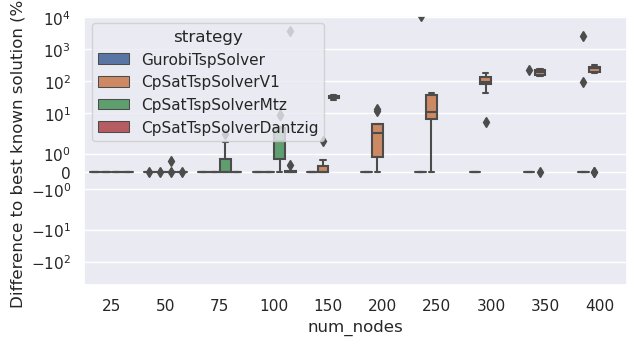

In [91]:
from IPython.display import display

t = results.merge(best_ub, on="instance_name", suffixes=("", "_best"))
t["diff_to_best"] = (t["objective"] / t["objective_best"] -1)*100
display(t)
display(t.groupby(["num_nodes", "strategy"])[["diff_to_best"]].median())
plt.figure(figsize=(7, 3.5))
sns.boxplot(data=t, x="num_nodes", y="diff_to_best", hue="strategy")
plt.ylabel("Difference to best known solution (%)")
# log scale on y-axis due to outliers
plt.yscale("symlog")

plt.show()

# Evaluating the performance of the different search strategies for our SAT-based Bottleneck TSP solver

## Ways to analyze the performance of an optimization algorithm with potentially exponential runtime

* Plot the percentage of instances solved within the time limit for each size. To get a slightly more detailed view, you can plot for different optimality gaps (i.e., the tolerance until which we consider an instance to be solved, despite being not yet optimal.). This plot allows you to estimate up to which size the instances are still solvable by a solver. However, this plot can make it difficult to compare the performance of solvers unless the performances are very different.
* Select a range of instances and create a plot where the x-axis is the time and the y-axis is the number of instances that have been solved within x seconds. See https://www.msoos.org/2013/04/cryptominisat-3-0-released/ for an example that compares different SAT-solvers. Note that this plot only allows you to compare the performance of different solvers, but not the performance of the same solver on different instances.
* Plot the average optimality gap at the time limit. In many cases, the solver will compute upper and lower bounds, allowing to estimate how far the current solution is from the optimal solution. Unfortunately, the optimality gap can be infinite if no solution could be computed within the time limit. Thus, this approach is only suited for solvers that are likely to get within a few percent of the optimal solution within the time limit. These cases are actually quite frequent such that this allows you to compare the quality of the solutions of different solvers. This also allows to integrate heuristics that do not provide bounds, as you could take the best bound of any solver known for the instance.

## Why don't we just plot the runtime?

Because we are dealing with NP-hard problems, the runtime for some instances can be prohibitively long.
Thus, we always have to work with a time limit.
This comes with the problem that we have entries without a solution and the runtime of the time limit, and have to decide how to handle them.
* If we ignore these entries, our benchmark suddenly only analyzes the easy instances.
* If we include them and just plot the runtime, the difficult instances clipped at the time limit will look easier than they are.
* If we assign them a very high runtime, a single outlier can ruin the whole plot.

In conclusion, we cannot just look on the runtime and have to use a more sophisticated measure.

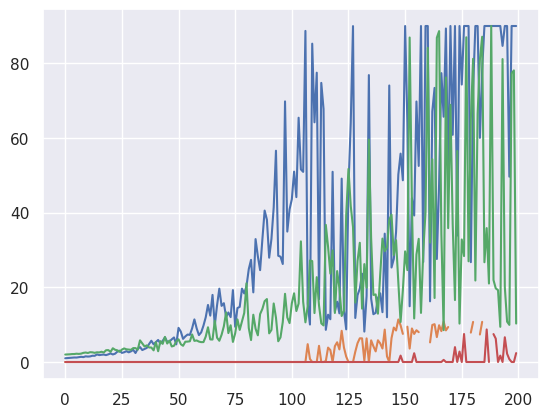

[(1.0, 0), (1.046969803525821, 0), (1.0713975825403204, 0), (1.1291742731591081, 0), (1.2073008590361178, 0), (1.195528795340262, 0), (1.289070681289207, 0), (1.3872624002268306, 0), (1.3076067348550617, 0), (1.5152235454904994, 0), (1.4539932305824956, 0), (1.5009468384789642, 0), (1.6774298535581778, 0), (1.6609008962612957, 0), (2.0256014077926943, 0), (1.850520419036015, 0), (1.9409337864677805, 0), (1.9957493096553522, 0), (1.8461962628423003, 0), (2.0468684126343897, 0), (2.300183504131894, 0), (2.022243234391151, 0), (2.225950585613221, 0), (2.7728258780656616, 0), (3.0312540500918783, 0), (2.4468076708537723, 0), (2.6105096592144887, 0), (2.9050766716859515, 0), (2.591087222170411, 0), (2.853677314193834, 0), (3.248050926956918, 0), (2.406187829458986, 0), (3.5321323384868424, 0), (4.0021266368270325, 0), (3.2051026044975903, 0), (3.5063288233173933, 0), (3.775153233518643, 0), (4.81421423330275, 0), (5.692844113793799, 0), (4.743698745060465, 0), (5.307492119080981, 0), (5.907

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = [i for i in range(200)]
def f(x: float):
    # exponential function with relative error
    return 1.02 ** (x * np.random.normal(1.0, 0.1))

class PseudoAlg:
    def __init__(self, base: float, std: float, mult: float, time_limit: float):
        self.base = base
        self.std = std
        self.mult = mult
        self.time_limit = time_limit

    def __call__(self, x: float):
        y = self.mult* self.base ** (x * np.random.normal(1.0, self.std))
        if y> self.time_limit:
            time_to_get_first_sol = np.random.normal(0.1, 0.01)*y
            if time_to_get_first_sol > self.time_limit:
                return self.time_limit, float('inf')
            initial_gap = np.random.normal(10, 1)
            gap = initial_gap * (1-(self.time_limit-time_to_get_first_sol)/(y-time_to_get_first_sol))
            return time_to_get_first_sol, gap
        return y, 0

    
alg1 = PseudoAlg(1.04, 0.1, 1, 90)
alg2 = PseudoAlg(1.02, 0.2, 2, 90)   
y = [alg1(i) for i in x]
y_ = [alg2(i) for i in x]
plt.plot(x, y)
plt.plot(x, y_)
plt.show()
print(y)
print(y_)
